In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [17]:
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [18]:
data = pd.read_csv('data_after_preprocessing_ma.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325274 entries, 0 to 325273
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             325274 non-null  int64  
 1   RecipeId               325274 non-null  int64  
 2   Name                   325274 non-null  object 
 3   CookTime               269167 non-null  object 
 4   PrepTime               325274 non-null  object 
 5   TotalTime              325274 non-null  object 
 6   RecipeIngredientParts  325274 non-null  object 
 7   Calories               325274 non-null  float64
 8   FatContent             325274 non-null  float64
 9   SaturatedFatContent    325274 non-null  float64
 10  CholesterolContent     325274 non-null  float64
 11  SodiumContent          325274 non-null  float64
 12  CarbohydrateContent    325274 non-null  float64
 13  FiberContent           325274 non-null  float64
 14  SugarContent           325274 non-nu

In [19]:
data.head()

,Unnamed: 0,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
2,7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
3,8,46,A Jad - Cucumber Pickle,NaN,PT25M,PT25M,"c(""rice vinegar"", ""haeo"")",4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1,"c(""Slice the cucumber in four lengthwise, then..."
4,9,47,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,"c(""butter"", ""brown sugar"", ""granulated sugar"",...",69.0,5.6,1.4,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte..."


In [20]:
columns_ = ['Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent']
columns_dataset = data[columns_]
columns_dataset.head(2)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


In [21]:
columns_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325274 entries, 0 to 325273
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calories             325274 non-null  float64
 1   FatContent           325274 non-null  float64
 2   SaturatedFatContent  325274 non-null  float64
 3   CholesterolContent   325274 non-null  float64
 4   SodiumContent        325274 non-null  float64
 5   CarbohydrateContent  325274 non-null  float64
 6   FiberContent         325274 non-null  float64
 7   SugarContent         325274 non-null  float64
 8   ProteinContent       325274 non-null  float64
dtypes: float64(9)
memory usage: 22.3 MB


In [22]:
X_train, X_test, y_train, y_test = train_test_split(columns_dataset[columns_], columns_dataset[columns_], test_size=0.3, random_state=42)

In [23]:
scaler=StandardScaler()

In [24]:
X_train_scale = scaler.fit_transform(X_train)

In [25]:
X_test_scale = scaler.transform(X_test)

In [26]:
y_train_scale = scaler.transform(y_train)

In [27]:
y_test_scale = scaler.transform(y_test)

# KNN

In [28]:
model = KNeighborsRegressor(n_neighbors=5) 
model.fit(X_train_scale, y_train_scale)

KNeighborsRegressor()

In [29]:
predict = model.predict(X_test_scale)

In [30]:
kn_mae = mean_absolute_error(y_test_scale, predict)
kn_mse = mean_squared_error(y_test_scale, predict)
kn_rmse = np.sqrt(kn_mse)
kn_r2 = r2_score(y_test_scale, predict)

print(f'Mean Absolute Error: {kn_mae}')
print(f'Mean Squared Error: {kn_mse}')
print(f'Root Mean Squared Error: {kn_rmse}')
print(f'r2 Squared Error: {kn_r2}')

Mean Absolute Error: 0.06473543407775914
Mean Squared Error: 0.009428993347794188
Root Mean Squared Error: 0.0971030038041779
r2 Squared Error: 0.9905243019276367


# Random Forest

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scale, y_train_scale)
predictions = model.predict(X_test_scale)

In [32]:
rf_mae = mean_absolute_error(y_test_scale, predictions)
rf_mse = mean_squared_error(y_test_scale, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test_scale, predictions)

print(f'Mean Absolute Error: {rf_mae}')
print(f'Mean Squared Error: {rf_mse}')
print(f'Root Mean Squared Error: {rf_rmse}')
print(f'R-squared: {rf_r2}')

Mean Absolute Error: 0.0810932874602047
Mean Squared Error: 0.01733569076401258
Root Mean Squared Error: 0.13166507040218595
R-squared: 0.9825874986718333


# Decision Tree

In [33]:
dt_model = DecisionTreeRegressor(random_state=42) 
dt_model.fit(X_train_scale, y_train_scale)
dt_predictions = dt_model.predict(X_test_scale)

In [34]:
dt_mae = mean_absolute_error(y_test_scale, dt_predictions)
dt_mse = mean_squared_error(y_test_scale, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test_scale, dt_predictions)

print(f'Mean Absolute Error: {dt_mae}')
print(f'Mean Squared Error: {dt_mse}')
print(f'Root Mean Squared Error: {dt_rmse}')
print(f'R-squared: {dt_r2}')

Mean Absolute Error: 0.14746738429578488
Mean Squared Error: 0.05713060023102534
Root Mean Squared Error: 0.23902008332151786
R-squared: 0.9426036700190361


# Linear Regression

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train_scale, y_train_scale)
lr_predictions = lr_model.predict(X_test_scale)

In [45]:
lr_mae = mean_absolute_error(y_test_scale, lr_predictions)
lr_mse = mean_squared_error(y_test_scale, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test_scale, lr_predictions)

print(f'Mean Absolute Error: {lr_mae}')
print(f'Mean Squared Error: {lr_mse}')
print(f'Root Mean Squared Error: {lr_rmse}')
print(f'R-squared: {lr_r2}')

Mean Absolute Error: 3.862513149859107e-15
Mean Squared Error: 3.99370062411581e-29
Root Mean Squared Error: 6.319573264165714e-15
R-squared: 1.0


#### Gaussian Naive Bayes target data should be 1-D

# SVR target data should be 1-D

# Performance visualization

In [46]:
models = ['K-Nearest Neighbor', 'Random Forest', 'Decision Tree', 'Linear Regression']

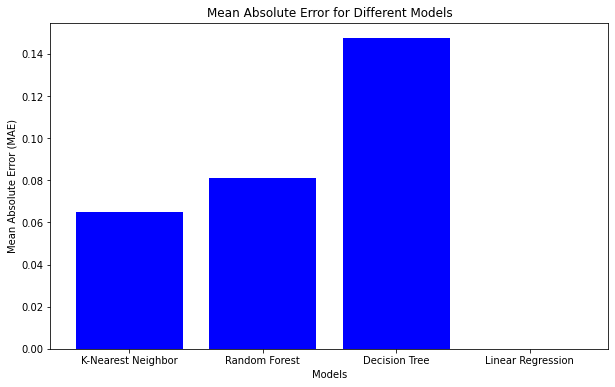

In [49]:
mae_values = [kn_mae, rf_mae, dt_mae, lr_mae]
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error for Different Models')
plt.show()

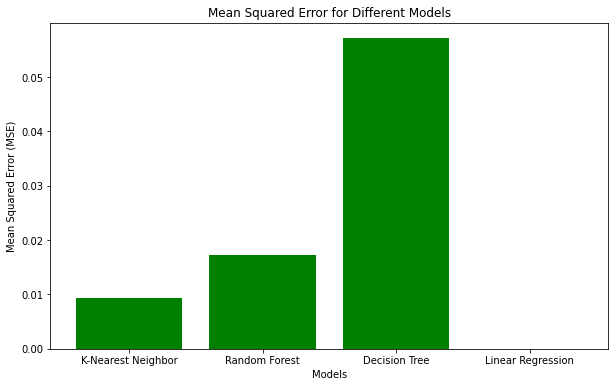

In [39]:
mse_values = [kn_mse, rf_mse, dt_mse, lr_mse]
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Different Models')
plt.show()

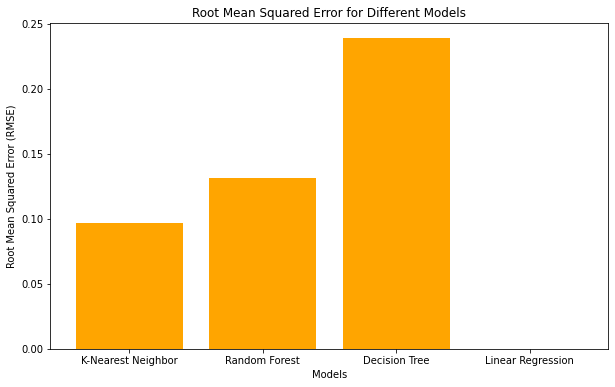

In [40]:
rmse_values = [kn_rmse, rf_rmse, dt_rmse, lr_rmse]
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error for Different Models')
plt.show()

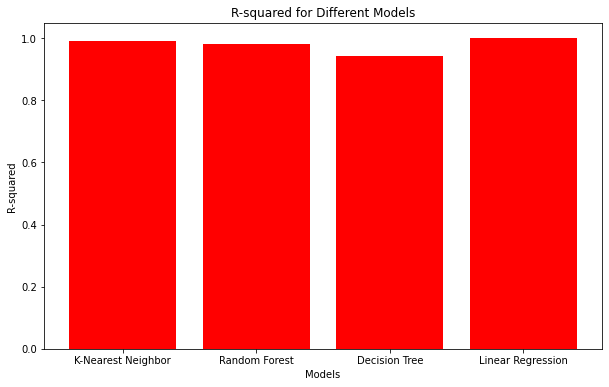

In [41]:
r_squared_values = [kn_r2, rf_r2, dt_r2, lr_r2]
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='red')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared for Different Models')
plt.show()